<a href="https://colab.research.google.com/github/jkoniecznyy/Machine-Learning-pyton/blob/main/ML_7_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zadanie
Zadanie polega na własnoręcznym zaimplementowaniu algorytmu k-means. Algorytm powinien być zaimplementowany w oparciu o bibliotekę `Numpy`. Podczas implementacji nie wolno korzystać z bibliotek typu `sklearn`, które mają ten algorytm wbudowany. Dopuszczalne jest natomiast wykorzystywanie tego rodzaju bibliotek w celach porównawczych, do sprawdzenia czy nasz algorytm działa poprawnie. Ocenie podlega rozwiązanie i odpowiedź.


- Zaimplementuj `K-means` w przestrzeni dwuwymiarowej (każdy punkt ma dwie współrzędne). - *(dostateczny)*
- Zmniejsz problem związany z 'utknięciem' w lokalnym optimum poprzez wywołanie algorytmu 100 razy i wybranie rozwiązania z najmniejszą funkcją kosztu - *(dostateczny plus)*
- Zwizualizuj wyniki na wykresie - *(dobry)*
- Rozszerz swoją implementację o `K-means++` lub zmień ją tak by działała w n-wymiarowej przestrzeni - *(bardzo dobry)*

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [6]:
def drawGraph(centroids, clusters):
    # draw the (only) 2 dimensional demonstrative graph for given centroids and clusters

    colors = ['b', 'g', 'r', 'c', 'm', 'y']
    plt.figure()

    for cluster in clusters:
        # go through every cluster
        for point in clusters[cluster]:
            # go through every point in a given cluster

            plt.scatter(point[0], point[1], c=colors[cluster % len(colors)], marker='.')
            # draw the 2 dimensional colorful graph
        plt.scatter(centroids[cluster][0], centroids[cluster][1], c='k', marker='x')


def calculateCost(centroids, clusters, totalPoints):
    # calculate the distance from all points to the
    # clusters there are assigned, the lower the better

    totalSum = 0.0
    for cluster in clusters:
        # go through every cluster

        totalSum += ((np.linalg.norm(clusters[cluster] - centroids[cluster])) ** 2)
        # calculate the distance for all of the points in the cluster to the assigned centroid
        # then return the sum of all of the distances divided by the total number of points

    return totalSum / totalPoints


def createClusters(data, centroids, numberOfCentroids):
    # Calculate the distance from every point to every centroid
    # and assign the point to the closest centroid

    clusters = {}
    for i in range(numberOfCentroids):
        clusters[i] = []
    # Prepare the clusters dictionary

    for point in data:
        # go through every point in given data
        distances = []
        for centroid in centroids:
            distances.append(np.linalg.norm(point - centroid))
        # calculate the distance from a point to every centroid
        # and save it in the distances array

        numberOfCluster = distances.index(min(distances))
        clusters[numberOfCluster].append(point)
        # assign the point to the 'closest cluster'

    return clusters


def createCentroids(data, numberOfCentroids):
    # Pick random set of points from given data and return them
    # as the starting centroids
    start = np.random.randint(len(data) - numberOfCentroids - 1)
    end = start + numberOfCentroids
    return data[start:end]


def moveCentroids(centroids, clusters):
    # Calculate the n dimensional average value for every cluster
    # and move the centroids to the calculated values

    for cluster in clusters:
        # go through every cluster

        averaged = np.average(clusters[cluster], axis=0)
        centroids[cluster] = averaged
        # calculate the average value for all coordinates of all points in given cluster
        # move the centroid to calculated value

    return centroids


def kmeansClustering(data, numberOfCentroids=3, kmeansExecutions=60, shiftsForExecution=30):
    # Take:
    # double array containing n dimensional coordinates of the points,
    # number of centroids (positive int),
    # number of executions of the k-means clustering (positive int),
    # number of centroid shifts for each k-means execution (positive int).
    #
    # Do:
    # Execute the k-means clustering a specified number of times and return centroids, clusters
    # and cost value of the most effective clustering achieved for given data.
    #
    # Return:
    # centroids - double array containing n dimensional coordinates of the centroids,
    # example: [ [coordinates of centroid0] [coordinates of centroid1] ... ]
    #
    # clusters  - Dictionary containing cluster number paired with
    #             double array containing n dimensional coordinates of the points ,
    # example: {0: points assigned to cluster0, 1: points assigned to cluster1, ...}
    #
    # cost      - double value of the cost function (the less the better).
    # example: 0.045024049907778196

    cost = np.inf
    # Set final cost value to infinite

    for i in range(kmeansExecutions):
        # Do the k-means clustering a specified number of times

        centroidsTemp = createCentroids(data, numberOfCentroids)
        # Create first centroids

        for x in range(shiftsForExecution):
            clustersTemp = createClusters(data, centroidsTemp, numberOfCentroids)
            centroidsTemp = moveCentroids(centroidsTemp, clustersTemp)
        # Match the points to the centroids and then 
        # recalculate the centroids for a specified number of times

        costTemp = calculateCost(centroidsTemp, clustersTemp, len(data))
        # Calculate the cost value for current centroids

        if costTemp < cost:
            cost = costTemp
            centroids = centroidsTemp
            clusters = clustersTemp
        # If the cost is less than the cost previously obtained save the parameters

    drawGraph(centroidsTemp, clustersTemp)
    return centroids, clusters, cost
    # Draw a graph and return the final results

points:  [[ 0.04090434  0.55963988]
 [-0.00357715  0.38332371]
 [ 0.39280115 -1.0716949 ]
 [ 0.41506401 -1.1177094 ]
 [ 0.05315929  0.23925319]
 [ 0.05910012  0.3237224 ]
 [ 0.39308817 -1.07157251]
 [ 0.27476963  0.3299967 ]
 [-0.32357766 -0.20178483]
 [-0.01040048 -0.51166653]
 [ 0.04978216  0.33116349]
 [ 0.444494   -1.18496642]
 [ 0.06017101  0.32288225]
 [-0.28901421  0.48012825]
 [ 0.67298212  0.37686736]]
centroids:  [[ 0.41506401 -1.1177094 ]
 [ 0.05315929  0.23925319]]
clusters:  {0: [array([ 0.39280115, -1.0716949 ]), array([ 0.41506401, -1.1177094 ]), array([ 0.39308817, -1.07157251]), array([ 0.444494  , -1.18496642])], 1: [array([0.04090434, 0.55963988]), array([-0.00357715,  0.38332371]), array([0.05315929, 0.23925319]), array([0.05910012, 0.3237224 ]), array([0.27476963, 0.3299967 ]), array([-0.32357766, -0.20178483]), array([-0.01040048, -0.51166653]), array([0.04978216, 0.33116349]), array([0.06017101, 0.32288225]), array([-0.28901421,  0.48012825]), array([0.67298212, 

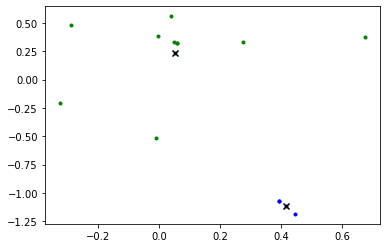

In [7]:
# Quick showdown 
# 2 Dimensions, 15 points, 2 centroids, 10 kmeansExecutions,  5 shiftsForExecution
numberOfDimensions = 2
numberOfCentroids = 2
points = np.vstack(((np.random.randn(5, numberOfDimensions) * 0.75),
                    (np.random.randn(5, numberOfDimensions) * 0.25),
                    (np.random.randn(5, numberOfDimensions) * 0.5)))
km = kmeansClustering(points, numberOfCentroids, 10, 5)

print('points: ', points)
print('centroids: ', km[0])
print('clusters: ', km[1])
print('cost: ', km[2])

2 dimensions
2 centroids cost value:  0.3768089420997877
4 centroids cost value:  0.16402402620400472


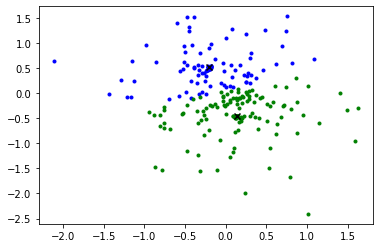

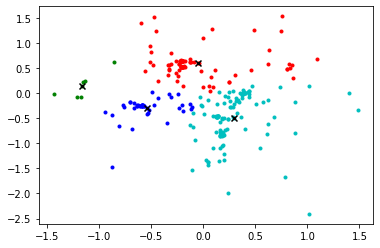

In [12]:
# 2 Dimensions, 250 points, 2 or 4 centroids, 40 kmeansExecutions,  20 shiftsForExecution
nrOfDimensions = 2
nrOfCentroids = 2
points = np.vstack(((np.random.randn(150, nrOfDimensions) * 0.75 ),
                  (np.random.randn(50, nrOfDimensions) * 0.25 ),
                  (np.random.randn(50, nrOfDimensions) * 0.5 )))
km1 = kmeansClustering(points, nrOfCentroids,  40, 20)
nrOfCentroids += 2
km2 = kmeansClustering(points, nrOfCentroids, 40, 20)

print(f'{nrOfDimensions} dimensions')
print(f'{nrOfCentroids-2} centroids cost value: ', km1[2])
print(f'{nrOfCentroids} centroids cost value: ', km2[2])

2 dimensions
4 centroids cost value:  0.21742048580014448
6 centroids cost value:  0.08729509654160372


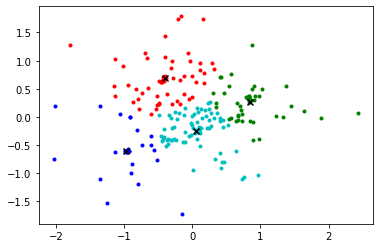

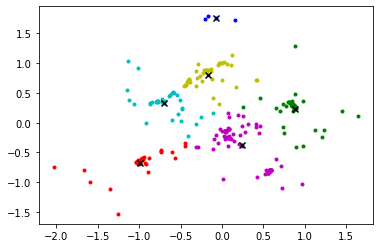

In [13]:
# 2 Dimensions, 250 points, 4 or 6 centroids, 40 kmeansExecutions,  20 shiftsForExecution
nrOfDimensions = 2
nrOfCentroids = 4
points = np.vstack(((np.random.randn(150, nrOfDimensions) * 0.75 ),
                  (np.random.randn(50, nrOfDimensions) * 0.25 ),
                  (np.random.randn(50, nrOfDimensions) * 0.5 )))
km1 = kmeansClustering(points, nrOfCentroids,  40, 20)
nrOfCentroids += 2
km2 = kmeansClustering(points, nrOfCentroids, 40, 20)

print(f'{nrOfDimensions} dimensions')
print(f'{nrOfCentroids-2} centroids cost value: ', km1[2])
print(f'{nrOfCentroids} centroids cost value: ', km2[2])

4 dimensions
2 centroids cost value:  0.9832784695539126
4 centroids cost value:  0.47225196895947474


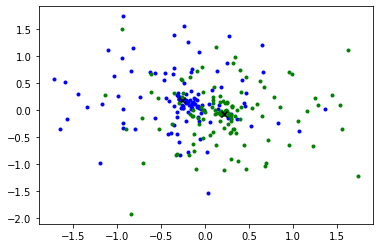

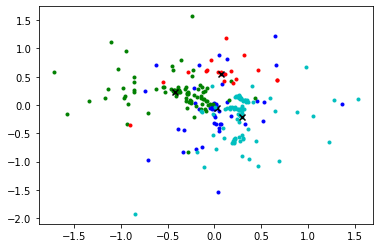

In [14]:
# 4 Dimensions, 250 points, 2 or 4 centroids, 40 kmeansExecutions,  20 shiftsForExecution
nrOfDimensions = 4
nrOfCentroids = 2
points = np.vstack(((np.random.randn(150, nrOfDimensions) * 0.75 ),
                  (np.random.randn(50, nrOfDimensions) * 0.25 ),
                  (np.random.randn(50, nrOfDimensions) * 0.5 )))
km1 = kmeansClustering(points, nrOfCentroids,  40, 20)
nrOfCentroids += 2
km2 = kmeansClustering(points, nrOfCentroids, 40, 20)

print(f'{nrOfDimensions} dimensions')
print(f'{nrOfCentroids-2} centroids cost value: ', km1[2])
print(f'{nrOfCentroids} centroids cost value: ', km2[2])

4 dimensions
4 centroids cost value:  0.48297179938939677
6 centroids cost value:  0.23257197337568014


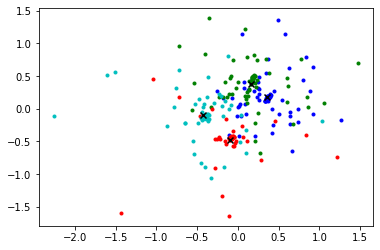

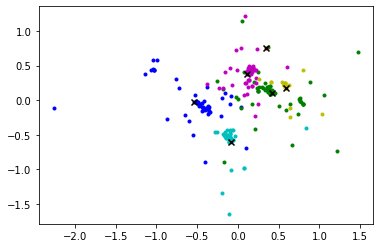

In [15]:
# 4 Dimensions, 250 points, 4 or 6 centroids, 40 kmeansExecutions,  20 shiftsForExecution
nrOfDimensions = 4
nrOfCentroids = 4
points = np.vstack(((np.random.randn(150, nrOfDimensions) * 0.75 ),
                  (np.random.randn(50, nrOfDimensions) * 0.25 ),
                  (np.random.randn(50, nrOfDimensions) * 0.5 )))
km1 = kmeansClustering(points, nrOfCentroids,  40, 20)
nrOfCentroids += 2
km2 = kmeansClustering(points, nrOfCentroids, 40, 20)

print(f'{nrOfDimensions} dimensions')
print(f'{nrOfCentroids-2} centroids cost value: ', km1[2])
print(f'{nrOfCentroids} centroids cost value: ', km2[2])